## 1. Import Modules and Data

In [415]:
#import modules for the analysis environment
import os
import matplotlib.pyplot as plta
import matplotlib as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import datetime
import ast
import gmaps
import datetime
import scipy.stats as stats
# from config import gkey

#read cleaned csv file
df = pd.read_csv("Data/clean_data/clean_data.csv")
df.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,07/06/2019,2355,N Hollywood,1591,99.0,Male,Unknown,STREET,GOODLAND AV,"(34.1371, -118.4062)"
1,07/06/2019,500,Foothill,1677,45.0,Male,White,STREET,GLENOAKS BL,"(34.2249, -118.3617)"
2,07/06/2019,1130,West Valley,1028,25.0,Male,Asian,STREET,SHERMAN WY,"(34.2012, -118.4989)"
3,07/06/2019,1415,Northeast,1153,29.0,Male,Unknown,STREET,LOS FELIZ BL,"(34.1081, -118.3078)"
4,07/06/2019,1230,Central,192,41.0,Male,Unknown,STREET,GRAND AV,"(34.0384, -118.2646)"


## 2. Victims by Race

In [389]:
# Create DataFrame with the total counts of each ethnicity
victim_race_counts = pd.DataFrame(df['victim_race'].value_counts())

# Remove Unknown victims from DataFrame
updated_victim_race = victim_race_counts.loc[['Hispanic','White','Black',
                                              'Asian','Pacific Islander','American Indian'],
                                             ['victim_race']]
updated_victim_race

,victim_race
Hispanic,156131
White,101618
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


In [380]:
#Calculate the percentage of total crashes per ethinicity 
percent_victim_race = updated_victim_race["victim_race"]/updated_victim_race["victim_race"].sum()*100

# Add a new colum display the calculated percentage
updated_victim_race["crash_population"] = percent_victim_race
updated_victim_race

,victim_race,crash_population
Hispanic,156131,45.913860
White,101618,29.883077
Black,58343,17.157082
Asian,23383,6.876301
Pacific Islander,442,0.129980
American Indian,135,0.039700


In [388]:
# Display only the percentage of crashes per ethnicity
pct_race_df = pd.DataFrame(updated_victim_race["crash_population"])

# Format percentage calculations with two digits and percentage sign
pct_race_df.style.format({"crash_population":"{:,.2f}%"})
pct_race_df

,crash_population
Hispanic,45.913860
White,29.883077
Black,17.157082
Asian,6.876301
Pacific Islander,0.129980
American Indian,0.039700


LA Population Composition by race
>- Hispanic: 48.2%
- White (non-hispanic): 28.5%
- Black: 9.0%
- Asian: 11.6%
- Pacific Islander: 0.2%
- American Indian: 0.4%
- Other: 0.6%

src: https://statisticalatlas.com/place/California/Los-Angeles/Race-and-Ethnicity 

In [382]:
ethn_dict = {"Hispanic":"48.2", 
             "White":"28.5", 
             "Black":"9.0", 
             "Asian":"11.6", 
             "Pacific Islander":"0.2", 
             "American Indian":"0.4"}

pct_race_df["LA_Population"] = pd.Series(ethn_dict)
multibar = pct_race_df.style.format({"crash_population":"{:,.2f}"})
multibar

,crash_population,LA_Population
Hispanic,45.91,48.2
White,29.88,28.5
Black,17.16,9.0
Asian,6.88,11.6
Pacific Islander,0.13,0.2
American Indian,0.04,0.4


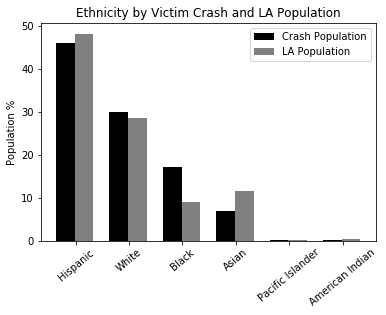

In [376]:
xaxis = ("H", "W", "B", "A", "P", "I")
crash_pop = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)

ind = np.arange(len(xaxis))
width = 0.35

plta.bar(ind - width/2, crash_pop, width, color="black", label="Crash Population")
plta.bar(ind + width/2, la_pop, width, color="gray", label="LA Population")

plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Population %")

plta.xticks(ind + width/20, ("Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"), rotation = 40)
plta.legend(loc="best")

plta.show()

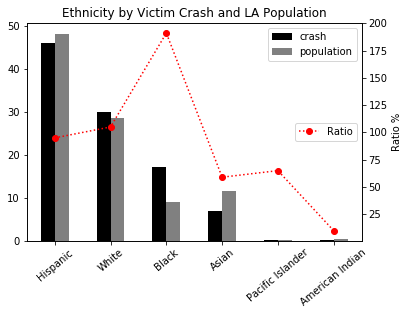

In [437]:
# Set parameres 
ratio = [95, 105, 191, 59, 65, 10]
xaxis = ["Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"] 
crash = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)
width = 0.35
ind = np.arange(len(xaxis))

# 
crash_data = pd.DataFrame(crash,xaxis)
crash_data[1] = la_pop
crash_data = crash_data.rename(columns = {0:'crash',1:'population'})

# Generate the Plot 
crash_fig = crash_data.plot(kind='bar', color=["black", "gray"], use_index=True)
line_data = crash_fig.twinx()
line_fig = line_data.plot(ratio, linestyle=':',marker='o',color='red', label='Ratio')

plta.legend(loc="right")
crash_fig.legend(loc="best")

# plta.legend((crash, population, ratio), ("Crash", "Population", "Ratio"))
plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Ratio %")
crash_fig.tick_params(axis='x', rotation=40)

#export
# plta.tight_layout()
# plta.savefig(os.path.join("figures","collision_by_ethnicity.png"))

## 3. Victims collusion by Gender

src: https://www.states101.com/gender-ratios/california/los-angeles-county

In [113]:
# Create DataFrame with the total counts of each ethnicity
sex_race_counts = pd.DataFrame(df['victim_sex'].value_counts())
sex_race_counts

,victim_sex
Male,234600
Female,165158
Unknown,963


In [371]:
sex_pct = sex_race_counts/sex_race_counts.sum()*100
sex_pct
sex_pct = sex_pct.loc[["Male", "Female"]]
sex_pct

,victim_sex
Male,58.544474
Female,41.215210


In [372]:
gender_pop = {"Male": "0.492531",
              "Female": "0.507468"}
sex_pct["pop_pct"] = pd.Series(gender_pop)
sex_pct

,victim_sex,pop_pct
Male,58.544474,0.492531
Female,41.215210,0.507468


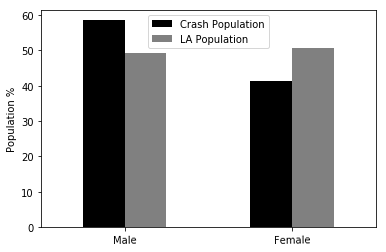

In [547]:
ratio = [118.86, 81.22]
xaxis = ['Male', 'Female'] 
crash = (58.54, 41.22)
la_pop = (49.25, 50.75)
width = 0.3
ind = np.arange(len(xaxis))
gender_data = pd.DataFrame(crash,xaxis)
gender_data[1] = la_pop
gender_data = gender_data.rename(columns = {0:'Crash Population',1:'LA Population'})
gender_fig = gender_data.plot(kind='bar', color=["black", "gray"], use_index=True)

# rects = gender_fig.patches
# labels=gender_data.gender_data[1].tolist()
# sum_labels = sum(labels)
# perc_labels = [round(i/sum_labels*100,2) for i in labels]
# perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
# for rect,label in zip(rects,perc_labels):
#       gender_fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va=
#               'bottom')
        
# gender_fig.spines['right'].set_visible(False)
# gender_fig.spines['top'].set_visible(False)
# gender_fig.spines['left'].set_visible(False)
# gender_fig.set_xlabel("")
# gender_fig.set_yticks("Population" %)

# # fig.set_title('Collision by Victim Age Means')
# gender_fig.legend().remove()

# rects = gender_fig.patches
# labels=gender_data.Population.tolist()
# labels=[round(i,0) for i in labels]
# sum_labels = sum(labels)
# # perc_labels = [round(i/sum_labels*100,2) for i in labels]
# # perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
# for rect,label in zip(rects,labels):
#       gender_fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va='bottom')

plta.legend(loc="center")
gender_fig.legend(loc="best")

# plta.legend((crash, population, ratio), ("Crash", "Population", "Ratio"))
# plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Population %")
gender_fig.tick_params(axis='x', rotation=1)

In [151]:
male_pct = 4982799/10116705
print(male_pct)

female_pct = 5133906/10116705
print(female_pct)

male_ratio = .585445/male_pct*100
print(male_ratio)

female_ratio = (.412152/female_pct)*100
print(female_ratio)

0.49253180754010323
0.5074681924598968
118.86440449885696
81.21730703990295


## 4. Age mean per Ethnicity

LA Age Categories

>- Children: less than 18 years old
- College: from 18 to 21 years old
- Younger Adult: from 22 to 39 years old
- Older Adult: from 40 to 64 years old
- Senior: more than 64 years old

src: https://statisticalatlas.com/place/California/Los-Angeles/Age-and-Sex

In [484]:
df1 = df.copy()
df1 = df1[['victim_race','victim_age']]
df1=df1.groupby(['victim_race'])
meandata = pd.DataFrame(df1['victim_age'].mean())
meandata = meandata[meandata.index!='Unknown']
meandata

,victim_age
victim_race,
American Indian,39.251852
Asian,43.144806
Black,42.442624
Hispanic,38.550448
Pacific Islander,43.513575
White,43.526373


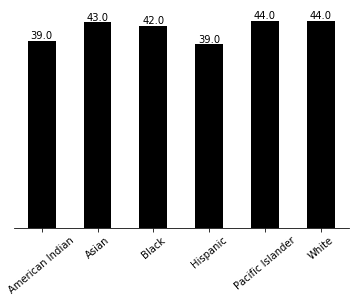

In [491]:

fig = meandata.plot(kind='bar', color="black")
fig.tick_params(axis='x', rotation=40)
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.set_xlabel("")
fig.set_yticks([])

# fig.set_title('Collision by Victim Age Means')
fig.legend().remove()

rects = fig.patches
labels=meandata.victim_age.tolist()
labels=[round(i,0) for i in labels]
sum_labels = sum(labels)
# perc_labels = [round(i/sum_labels*100,2) for i in labels]
# perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,labels):
      fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va='bottom')
        

In [500]:
race_data
race_data = race_data[race_data.index!='Unknown']
race_data

,victim_race
Hispanic,156131
White,101618
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


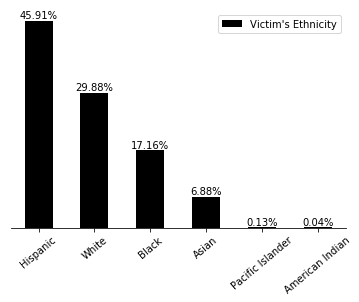

In [503]:
#get an overview of victim in race distribution
df['victim_race'].value_counts()

#bar graph
race_data = pd.DataFrame(df['victim_race'].value_counts())
race_data = race_data[race_data.index!='Unknown']

fig = race_data.plot(kind='bar',color='black')
fig.set_xlabel('')
fig.set_yticks([])
# fig.set_title('Collision By Ethnicity')
rects = fig.patches
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
      fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va=
              'bottom')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.tick_params(axis='x', rotation=40)
fig.legend(["Victim's Ethnicity"])

In [512]:
df1 = df.copy()
df1 = pd.DataFrame(df["victim_race"])
df2 = df1.loc["Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"]
df2 = df2[['victim_race','victim_age']]
# df1=df1.groupby(['victim_race']).sort_values(by='victim_race')
# meandata = pd.DataFrame(df1['victim_age'].mean())
# meandata.plot(kind='bar')
df2.head()
df2.boxplot('victim_age',by='victim_race', figsize=(20, 10))

IndexingError: Too many indexers

In [504]:
df1

Text(0, 0.5, 'Age')

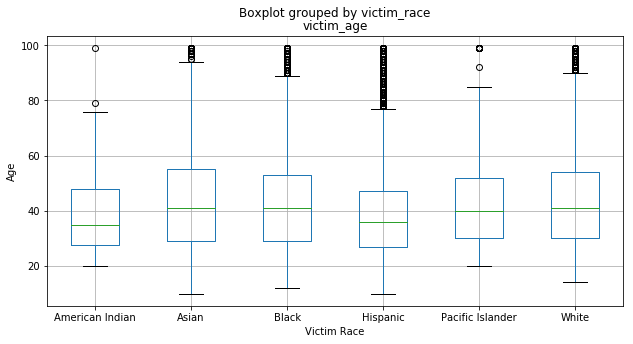

In [535]:

df1 = df.copy()
df1 = df1[['victim_race','victim_age']]
df1 = df1[df1['victim_race']!='Unknown']

# df1=df1.groupby(['victim_race']).sort_values(by='victim_race')
# meandata = pd.DataFrame(df1['victim_age'].mean())
# meandata.plot(kind='bar')
df1.head()
fig = df1.boxplot('victim_age',by='victim_race', figsize=(10, 5))
fig.set_xlabel("Victim Race")
fig.set_ylabel("Age")


In [508]:
df1["victim_race"]

0          Unknown
1            White
2            Asian
3          Unknown
4          Unknown
5            White
6         Hispanic
7            White
8         Hispanic
9         Hispanic
10        Hispanic
11         Unknown
12        Hispanic
13           White
14        Hispanic
15        Hispanic
16           White
17        Hispanic
18        Hispanic
19        Hispanic
20           Black
21           Black
22           White
23        Hispanic
24        Hispanic
25           White
26        Hispanic
27        Hispanic
28        Hispanic
29        Hispanic
            ...   
400691       White
400692       Black
400693    Hispanic
400694    Hispanic
400695       White
400696    Hispanic
400697    Hispanic
400698    Hispanic
400699    Hispanic
400700       White
400701    Hispanic
400702    Hispanic
400703       Asian
400704       White
400705    Hispanic
400706     Unknown
400707    Hispanic
400708       White
400709       White
400710       Black
400711    Hispanic
400712    Hi

In [413]:
# Extract individual groups
Hispanic = df1[df1["victim_race"] == "Hispanic"]["victim_age"]
White =  df1[df1["victim_race"] == "White"]["victim_age"]
Black = df1[df1["victim_race"] == "Black"]["victim_age"]
Asian = df1[df1["victim_race"] == "Asian"]["victim_age"]
PacificIsl = df1[df1["victim_race"] == "Pacific Islander"]["victim_age"]
AmericanInd = df1[df1["victim_race"] == "American Indian"]["victim_age"]

In [416]:
# Perform the ANOVA
stats.f_oneway(Hispanic, White, Black, Asian, PacificIsl, AmericanInd)

F_onewayResult(statistic=1566.0672656810764, pvalue=0.0)

In [384]:
#create bins to extract age range
bins = [0,19,22,40,65, float("inf")]
age = ["Children ( < 18 years old )",
       "College ( 18 to 21 years old )",
       "Younger Adult ( 22 to 39 years old )",
       "Older Adult ( 40 to 64 years old )",
       "Senior ( > 64 years old )"]

df['Age Category'] = pd.cut(df['victim_age'],bins, right=False, labels=age)

age_group = df.groupby("Age Category")
print(age_group["victim_race", "victim_age"].mean())

age_count["age_count"] = age_group[["victim_age"]].count()
age_count["age_mean"] = age_group["victim_age"].mean()
age_df = age_count[["age_count","age_mean"]]
age_df

                                      victim_age
Age Category                                    
Children ( < 18 years old )            17.578563
College ( 18 to 21 years old )         20.504053
Younger Adult ( 22 to 39 years old )   29.902646
Older Adult ( 40 to 64 years old )     50.168594
Senior ( > 64 years old )              76.831921


,age_count,age_mean
Age Category,,
Children ( < 18 years old ),821,17.578563
College ( 18 to 21 years old ),18256,20.504053
Younger Adult ( 22 to 39 years old ),186505,29.902646
Older Adult ( 40 to 64 years old ),161744,50.168594
Senior ( > 64 years old ),33395,76.831921
